## Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.spatial import distance_matrix
from sklearn.cluster import KMeans,AgglomerativeClustering 
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import apyori as ap

## Loading Data

In [2]:
df = pd.read_excel('Data_Pathrise.xlsx')

### Data Cleaning

#### Getting the number of rows and columns in the data

In [3]:
df.shape

(2544, 16)

We have 16 colummns in our dataset and 2544 number of rows.

In [4]:
df.head()

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American


#### Get the column data type

In [5]:
# Getting column type of the data
df.dtypes

id                               int64
pathrise_status                 object
primary_track                   object
cohort_tag                      object
program_duration_days          float64
placed                           int64
employment_status               object
highest_level_of_education      object
length_of_job_search            object
biggest_challenge_in_search     object
professional_experience         object
work_authorization_status       object
number_of_interviews           float64
number_of_applications           int64
gender                          object
race                            object
dtype: object

#### Get percentage of na and null in each column

In [6]:
round(df.isna().mean(),4)*100

id                              0.00
pathrise_status                 0.00
primary_track                   0.00
cohort_tag                      0.31
program_duration_days          24.21
placed                          0.00
employment_status               9.00
highest_level_of_education      2.28
length_of_job_search            2.91
biggest_challenge_in_search     0.94
professional_experience         8.73
work_authorization_status      11.16
number_of_interviews            8.57
number_of_applications          0.00
gender                         19.34
race                            0.71
dtype: float64

Looks like there are some missing values. Since some of the columns are returning non zero value.

Since it's not feasible removing each row containing NAN as it will lead to loss of data. For the NA in Quantitative columns we will replace them by the mean of the whole column. And will drop the rows containing NA for column with categorical values.

In [7]:
# Need to drop rows containing NA for Categorical data
df = df[df['employment_status '].notna()]
df = df[df['highest_level_of_education'].notna()]
df = df[df['length_of_job_search'].notna()]
df = df[df['gender'].notna()]
df = df[df['race'].notna()]
df = df[df['work_authorization_status'].notna()]
df = df[df['biggest_challenge_in_search'].notna()]
df = df[df['cohort_tag'].notna()]
df = df[df['professional_experience'].notna()]

In [8]:
# Replacing the NA values with mean of the whole column for Quantitative data
df.fillna(df.mean(), inplace = True)

In [9]:
df.isnull().values.any()

False

False indicates that there is no NA values in our dataframe.

### Viewing Basic Statistics about our Data

In [10]:
df.describe()

,id,program_duration_days,placed,number_of_interviews,number_of_applications
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,1106.138889,131.228281,0.377778,2.243921,38.238889
std,719.046476,108.562016,0.485000,2.910371,53.013679
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,486.750000,37.000000,0.000000,0.000000,9.000000
50%,1043.500000,131.228281,0.000000,2.000000,20.000000
75%,1698.250000,173.000000,1.000000,3.000000,50.000000
max,2544.000000,548.000000,1.000000,20.000000,900.000000


## EDA

**Analysis of Target Variable**

0    896
1    544
Name: placed, dtype: int64


/Users/sahebsingh/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


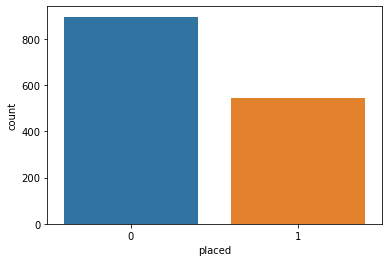

In [11]:
print(df['placed'].value_counts())
sns.countplot(df['placed'])
plt.show()

We can see that there is an imbalance in our dataframe as we have more number of 0 than 1. This is not a good thign cause that means that our target variable is imabalance. 

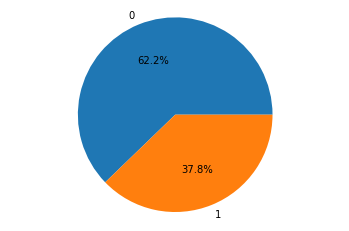

In [12]:
data = df['placed'].value_counts()
labels = ['0', '1']
size = [data[0], data[1]]
fig1, ax1 = plt.subplots()
ax1.pie(size, labels = labels, autopct = '%1.1f%%')
ax1.axis('equal')
plt.show()

Out of total Placed values, 0 appears 62.2% of times and 1 appears 37.8% of times.

### Understading Categorical Columns wrt Placement Days

#### Analyzing Time taken for Placement by Primary Track

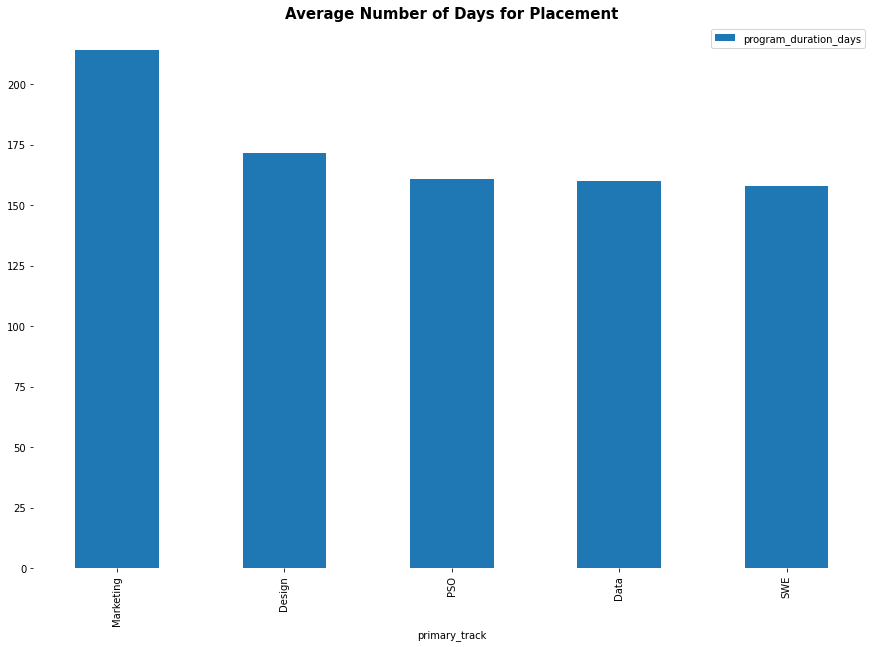

In [13]:
df_1 = df[df['placed'] == 1]
df_loc = df_1.groupby('primary_track').agg({'program_duration_days':'mean'}).sort_values(by='program_duration_days', ascending=False) 
df_loc.plot(kind='bar',figsize=(15,10))
plt.box(False)
plt.title ('Average Number of Days for Placement', fontsize=15, fontweight="bold")
plt.show()

Can primary track have a significant impact on the number of days taken for placement. By looking at the graph we can say employees with ***Marketing*** has a significant number of higher program duration days. For the graph we have only taken the data points where the pathrise_status is Placed for better understanding. 

#### Analyzing time taken for Placement by Employment Status

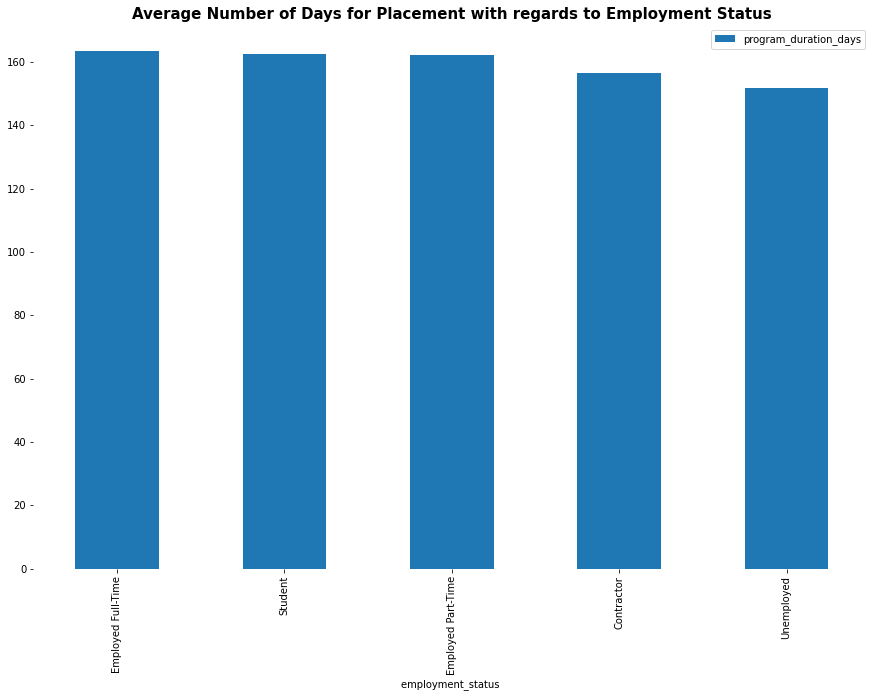

In [14]:
df_1 = df[df['placed'] == 1]
df_loc = df_1.groupby('employment_status ').agg({'program_duration_days':'mean'}).sort_values(by='program_duration_days', ascending=False) 
df_loc.plot(kind='bar',figsize=(15,10))
plt.box(False)
plt.title ('Average Number of Days for Placement with regards to Employment Status', fontsize=15, fontweight="bold")
plt.show()

We can see that employment status does not make a huge difference in terms of days taken for placement. 

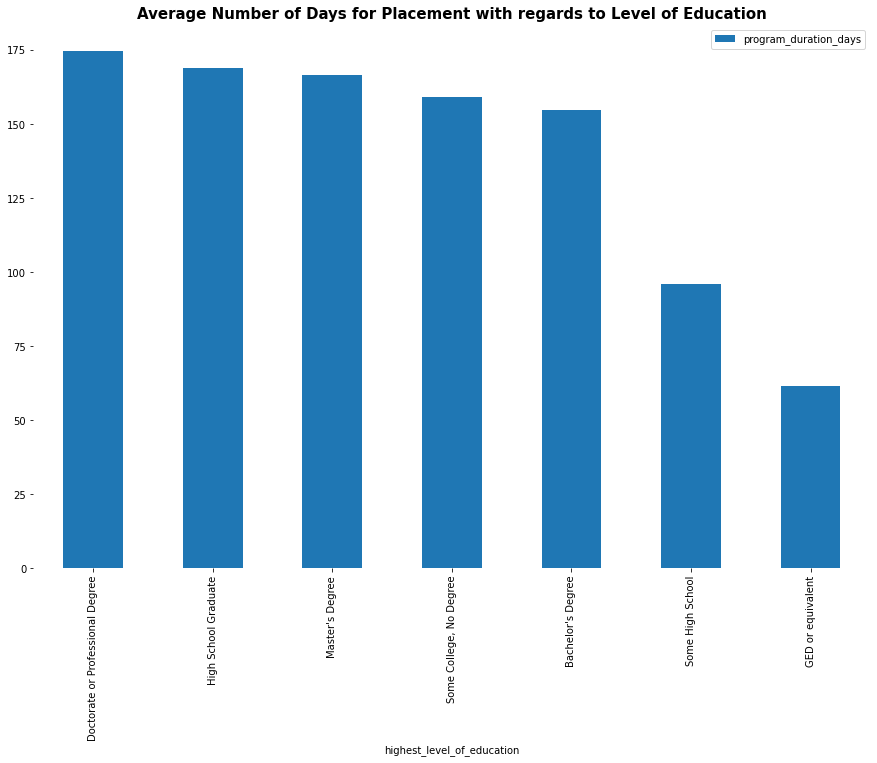

In [15]:
df_1 = df[df['placed'] == 1]
df_loc = df_1.groupby('highest_level_of_education').agg({'program_duration_days':'mean'}).sort_values(by='program_duration_days', ascending=False) 
df_loc.plot(kind='bar',figsize=(15,10))
plt.box(False)
plt.title ('Average Number of Days for Placement with regards to Level of Education', fontsize=15, fontweight="bold")
plt.show()

We see that highest level of education makesit difficult to get a job. Could this be due to the fact that we have more number of persons with Doctorate with respect to persons with only high school. 

In [16]:
unique = df['highest_level_of_education'].unique()
unique
for i in unique:
    a = len(df[df['highest_level_of_education']==i])
    print("Level of education: {} and Count: {}".format(i, a))

Level of education: Bachelor's Degree and Count: 785
Level of education: Some College, No Degree and Count: 85
Level of education: Master's Degree and Count: 485
Level of education: Doctorate or Professional Degree and Count: 65
Level of education: High School Graduate and Count: 9
Level of education: GED or equivalent and Count: 6
Level of education: Some High School and Count: 5


As we can see that our dataset is is imbalanced with respect to different level of education. Which means we cannot use level of education as a factor for determining the number of days it would take to find a job. 

### Understanding Quantatitive Columns wrt Placement Days

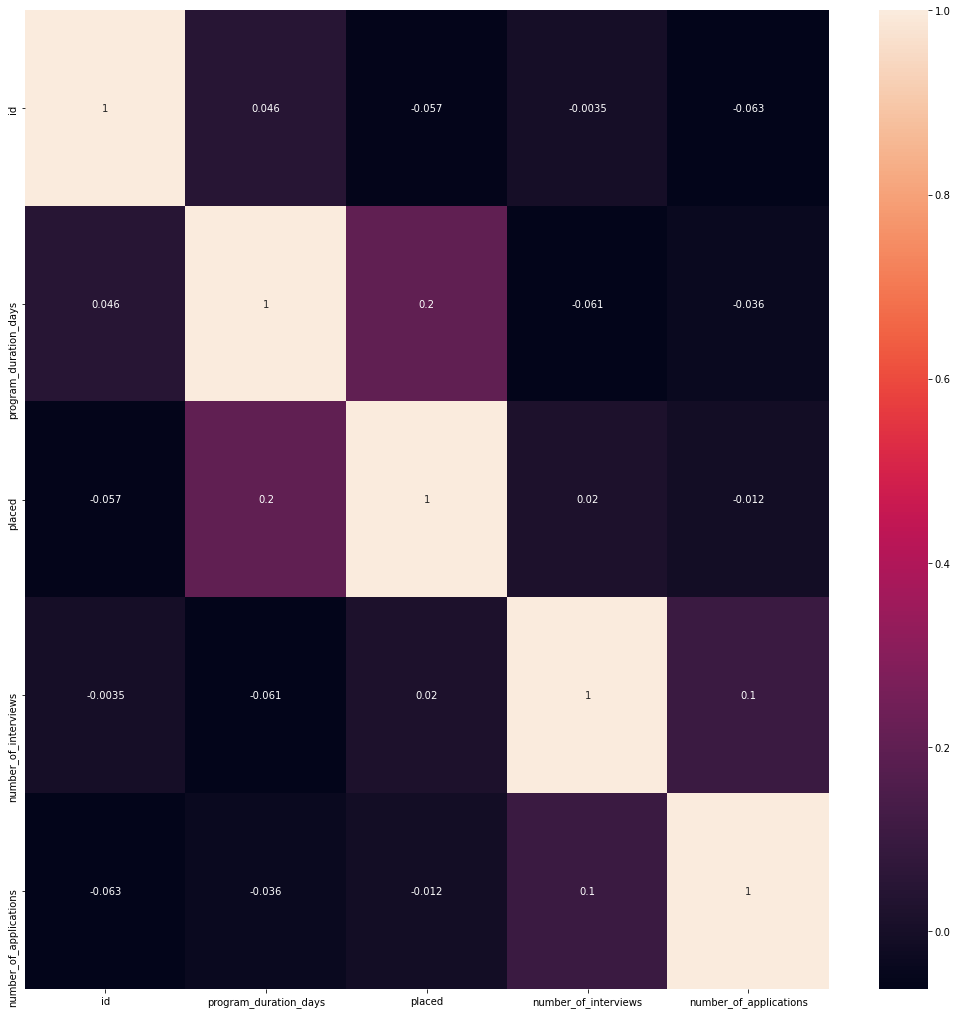

In [17]:
plt.figure(figsize=(18,18))
c= df.corr()
sns.heatmap(c,annot=True)
plt.show()

Using correlation matrix we are unable to see any column with a strong relationship with program_duration_days.


## Data Preprocessing

Data preprocessing to prepare our data for modelling. 

### Preparing our dataset for K Means

To apply K Means we need to convert the categorical columns into Quantitative columns

In [18]:
# Selecting all object columns
cat_df = df.select_dtypes(include=['object']).copy()

# Encoding the columns
lb_make = LabelEncoder()
for i in cat_df:
    cat_df[i+'1'] = lb_make.fit_transform(cat_df[i])

# Columns in the df
col = ['pathrise_status', 'primary_track', 'cohort_tag', 'employment_status ',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'gender', 'race']
df_1 = df.copy()
# Adding converted labels to df
for i in col:
    df_1[i] = cat_df[i+'1']



## K Means

In [19]:
X = df_1.drop(columns = ['placed','pathrise_status', 'id'])
y = df_1['placed']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Applying KMeans mode with 2 clusters as our model should perform Binary Classification. Parameters: n_init means the number of time the algorithm will run with different centroids, max_iter means the maximum number of iteration Kmeans will perform.

In [21]:
kmeans = KMeans(n_clusters=2, n_init=25, max_iter=100, random_state=6)
kmeans.fit(x_train)

KMeans(max_iter=100, n_clusters=2, n_init=25, random_state=6)

#### Evaluating Performance of our model

In [22]:
pred = kmeans.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77       271
           1       0.61      0.35      0.44       161

    accuracy                           0.67       432
   macro avg       0.65      0.61      0.61       432
weighted avg       0.66      0.67      0.65       432



Using K Means we are getting the accuracy of around 0.67, which is not really high. And therefore we will try to apply different clustering algorithm. 

## Hierarchical Agglomerative Clustering

Hierarchical clustering is where you build a cluster tree to represent data. We will use 'Dendograms' for better explaination.

Implementing Dendogram on Testing dataset

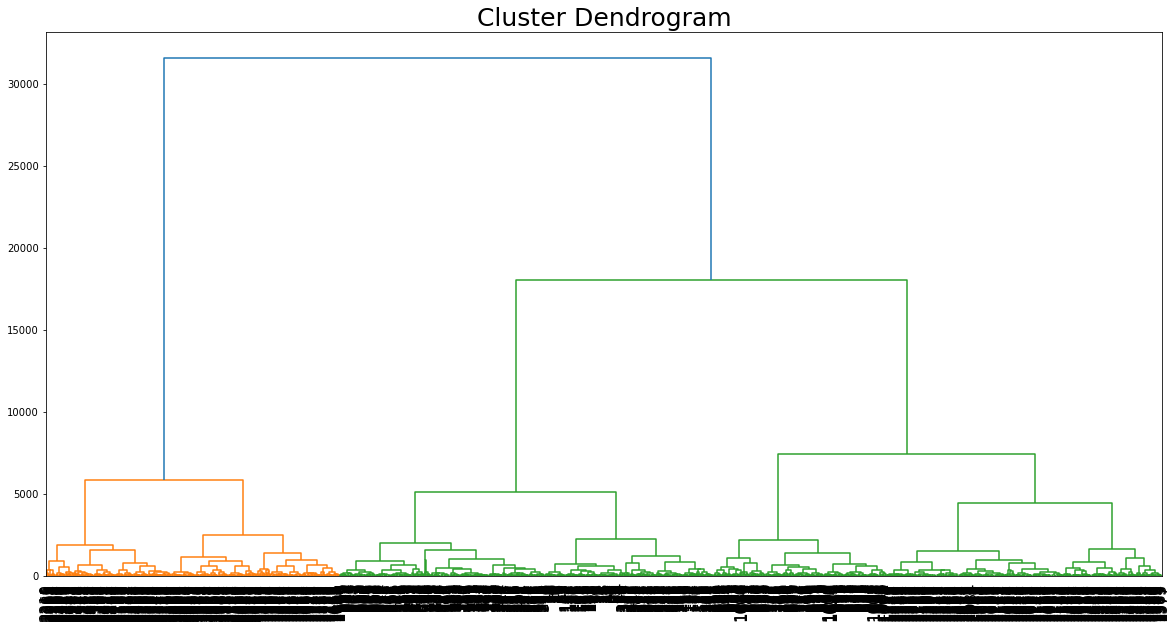

In [23]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(df_1)

fig, ax = plt.subplots(figsize=(20, 10))
ax.grid(False)
ax.set_title('Cluster Dendrogram', fontsize = 25)
ax = dendrogram(linkage_matrix, orientation='top', labels=df_1.index)
plt.xticks(fontsize=15)
plt.show()

In [24]:
clustering = AgglomerativeClustering(distance_threshold=None, n_clusters=2,linkage = "ward").fit(X)

#### Evaluating performance of our model

In [25]:
lab = 1 - clustering.labels_
print(classification_report(y, lab))

              precision    recall  f1-score   support

           0       0.63      0.40      0.49       896
           1       0.38      0.62      0.47       544

    accuracy                           0.48      1440
   macro avg       0.51      0.51      0.48      1440
weighted avg       0.54      0.48      0.48      1440



Using Hierarchical Aggloremative Clustering we get a low accuracy of 0.48. 

We get even worse performance using Aggloremative Clustering and therefore we will look at another algorithm. 

## Decision Tree Classifier

Decision tree classifier creates a tree like structure that emulate human's decision making flow. Decision Tree is used to improve business decision making and support ina lot of industries.


In [26]:
clf = DecisionTreeClassifier()

In [27]:
clf.fit(x_train, y_train)

DecisionTreeClassifier()

#### Evaluating performance of our model

In [28]:
pred = clf.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       271
           1       0.73      0.66      0.70       161

    accuracy                           0.78       432
   macro avg       0.77      0.76      0.77       432
weighted avg       0.78      0.78      0.78       432



Using decision trees we get an accuracy of 78% and precision of 80%

### Enhancing Performance using Hyperparameters Tuning

We can improve performance of our model by using Hyperparameters tuning, we will do this by Parameter Grid in which we will use different combination of parameters and take the one giving us best results.

In [29]:
# Making a parameter grid
param_grid = {'criterion': ['gini', 'entropy'],
              'min_samples_split': [2, 4, 6, 8, 10],
              'min_samples_leaf': [1, 3, 5, 7, 9],
              'max_leaf_nodes': [2, 5, 10, 20]}
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')
grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [2, 5, 10, 20],
                         'min_samples_leaf': [1, 3, 5, 7, 9],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             scoring='accuracy')

In [30]:
pred = grid.best_estimator_.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       271
           1       0.70      0.90      0.79       161

    accuracy                           0.82       432
   macro avg       0.81      0.84      0.82       432
weighted avg       0.84      0.82      0.82       432



After hyperparameter tuning we get an improved accuracy of 82% and precision of 93%

Using decision tree classifier we are able to get an accuracy of 82% a significant improvement from previous clustering techniques. The reason we did not go for Random Forest is that the size of the dataset is too small and we were worried that might lead to our model overfitting. 

## Association Rule Mining

We will now look at the factors which affect placement of an employee using Apriori. 

Data Preprocessing for Associate Rule Mining

#### Converting Number of Applications into categorical data.

In [31]:
df['number_of_applications'] = pd.qcut(df['number_of_applications'], q=4, labels=['<=37.0', '>37.0 <=131.0', '>131.0 <=173.0', '>173.0'])

In [32]:
df_2 = df.copy()
df_2 = df_2.drop(columns=['pathrise_status','id'])
columns = ['primary_track', 'cohort_tag', 'employment_status ',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'gender', 'race', 'placed']
not_used_columns = list(set(df_2.columns.to_list()) - set(columns))
df_2 = pd.get_dummies(df_2, columns=columns)
df_2.drop(labels=not_used_columns, axis=1, inplace=True)

## Apriori with default parameters

In [33]:
features = apriori(df_2, use_colnames = True)

In [34]:
features.sort_values(by='support', ascending = False)

,support,itemsets
2,0.721528,(gender_Male)
0,0.661806,(primary_track_SWE)
3,0.622222,(placed_0)
1,0.545139,(highest_level_of_education_Bachelor's Degree)
4,0.500000,"(primary_track_SWE, gender_Male)"


We can see that we are getting placement 0 with the highest support, this is due to the fact that large number of our rows bas attrition no. We are unable to make any assumptions using this itemsets and therefore we need to fine tune the model using hyperparameters.

## Appriori with Tuned Parameters

#### Applying Apriori with for Placement

In [35]:
#Apriori min support
min_support = 0.02 # Since the number of Attrition = Yes is so less, min_support also needs to be small 

#Max lenght of apriori n-grams
max_len = 3

frequent_items = apriori(df_2, use_colnames=True, min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)

target = '{\'placed_1\'}'

results_attrition_yes = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)

results_attrition_yes.head(4)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1032,"(primary_track_SWE, cohort_tag_DEC18A)",(placed_1),0.029861,0.377778,0.020139,0.674419,1.785226,0.008858,1.911111
1054,"(primary_track_SWE, cohort_tag_JAN19A)",(placed_1),0.037500,0.377778,0.022222,0.592593,1.568627,0.008056,1.527273
2068,"(gender_Male, cohort_tag_JAN19A)",(placed_1),0.038889,0.377778,0.022917,0.589286,1.559874,0.008225,1.514976
10938,(biggest_challenge_in_search_Getting past fina...,(placed_1),0.060417,0.377778,0.035417,0.586207,1.551724,0.012593,1.503704


***We can clearly see that cohort of the person and the data stream in which they are looking for jobs is the most important. We saw a similar trend during EDA when the average number of placement days were different based on the stream. We can also see that if the employee is having trouble getting past the final interview that person would likely be placed using Pathrise.*** 

#### Applying Apriori without  Placement

In [36]:
#Apriori min support
min_support = 0.2  

#Max lenght of apriori n-grams
max_len = 3

frequent_items = apriori(df_2, use_colnames=True, min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)

target = '{\'placed_0\'}'

results_attrition_yes = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)

results_attrition_yes.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
25,(highest_level_of_education_Master's Degree),(placed_0),0.336806,0.622222,0.213889,0.635052,1.020619,0.004321,1.035154
29,(length_of_job_search_Less than one month),(placed_0),0.331250,0.622222,0.209722,0.633124,1.017520,0.003611,1.029714
33,(professional_experience_1-2 years),(placed_0),0.388889,0.622222,0.245833,0.632143,1.015944,0.003858,1.026969


***We can see that person's year of experience, highest level of education and the amount of time spend on job search is important to analyze if the person will be placed in the future. As low work experience, level of education shows that the person will most likely wont be placed.***

## Conclusion

**1)Comparing all the classifiers we can say that the Decision Tree is the best classifier after looking at Accuracy and Recall. 
<br><br>
2)We can see that higher level of education, work experience, and the stream in which they are applying have a strong correlation with that person getting placed.** 
